<h1><center>Data Wrangling and Feature Engineering</center></h1>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl

from datetime import timedelta
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

%matplotlib inline

In [2]:
train_users=pd.read_csv('data/train_users_2.csv')
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
sessions=pd.read_csv('data/sessions.csv')
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [4]:
countries=pd.read_csv('data/countries.csv')
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [5]:
age_gender_bkts=pd.read_csv('data/age_gender_bkts.csv')
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [6]:
test_users=pd.read_csv('data/test_users.csv')
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


# Data Wrangling

Drop NDF in destination rows. Because we want to predict destination, no destination is not an option for predicting, even though in reality maybe it does contain information of the group of people who didn't book trips. 

In [7]:
train_users=train_users[train_users.country_destination!='NDF']

Review the data in all columns, to check for missing values and the frequency of values in a given column.

In [8]:
for i in train_users.columns:
    print(i,'\n', train_users[i].value_counts(),'\n####################')

id 
 csthhnkkxd    1
bimzv4ej2c    1
8bupmrjhgq    1
5wenvr1lj6    1
0rf4nydr92    1
88kt8dc2wy    1
anntyjbblk    1
p1ulwalqpb    1
7tjoouauhn    1
1ut46sp1jt    1
6kka3kj507    1
13u520vx9t    1
vpjoxre48m    1
9dwgw9r5oz    1
fro4jkgov0    1
h2y9kcmc0k    1
bo7je71sdi    1
8mrwabvjkl    1
6q1li2eyua    1
r5odla4v1l    1
ranh94tmin    1
xt3omdcua7    1
214g3f854j    1
2gzf98g24a    1
yfxthw4sv4    1
8nydzma1q9    1
toluex5jv9    1
xwjmuhkvn1    1
7rykcno2wa    1
oyvu9nxt56    1
             ..
gpj4llp7gq    1
ozjmo0x2zk    1
p00rulmg2g    1
xtnkd2xqd9    1
vnw6skytzv    1
qgrz3a0bu9    1
47ut1uoeey    1
37ad3wnnvz    1
bdszf32in5    1
ckfbzrh59u    1
jlxs8tl41f    1
8nuz67wyes    1
0opxek8oac    1
oq0dr6n9h4    1
ue9uujwaqq    1
yk8ypg95w1    1
1glbeo3qb6    1
36dowvsnhg    1
njqky5aygb    1
4ivuh289fd    1
pyiammc4h7    1
xiq3huugoh    1
7nlzsx58u7    1
3yzaj6n85u    1
edhjrggoqd    1
mtuvyibtd7    1
zaaub44vws    1
a8ygke5b14    1
f4y6zmwgwo    1
z1in9gjz08    1
Name: id, dtype: in

For entries that have unknown values or bad values, replace with np.NaN first. 

In [9]:
# gender
train_users['gender'].replace('-unknown-',np.NaN,inplace=True)

# age 
train_users.loc[train_users.age >= 100, 'age'] = np.NaN

For catogorical data with catogories having low frequency, group those low frequency catogories to one catogoary.

In [10]:
# language
lgvc=train_users.language.value_counts()
fltr= lgvc<100
smgrp=lgvc[fltr].index.values
train_users['language'].replace(smgrp,'other',inplace=True)

# signup_flow replace small frequency values with 30
spvc=train_users.signup_flow.value_counts()
fltr= spvc<100
smgrp=spvc[fltr].index.values
train_users['signup_flow'].replace(smgrp,30,inplace=True)

# affiliate_provider
afvc=train_users.affiliate_provider.value_counts()
fltr= afvc <100
smgrp=afvc[fltr].index.values
train_users['affiliate_provider'].replace(smgrp,'other',inplace=True)

# first_browser 
train_users['first_browser'].replace('-unknown-',np.NaN,inplace=True)
fbvc=train_users.first_browser.value_counts()
fltr= fbvc<100
smgrp=fbvc[fltr].index.values
train_users['first_browser'].replace(smgrp,'other',inplace=True)

# Feature Engineering

### Train_users data

Extract time parameters to get new features.
Even though date_first_booking is not known in reality and also it is not contained in test data, but analyzing this information would be useful in learning the historic booking pattern and also help to predict this exact parameter. So keep it for analysis part in this study before machine learning.

In [11]:
# extract information from time
train_users['date_first_booking']=pd.to_datetime(train_users['date_first_booking'])
train_users['weekdays_first_booking']=train_users['date_first_booking'].dt.weekday
train_users['year_first_booking']=train_users['date_first_booking'].dt.year
train_users['month_first_booking']=train_users['date_first_booking'].dt.month
train_users['day_first_booking']=train_users['date_first_booking'].dt.day
train_users['day_of_year_first_booking']=train_users['date_first_booking'].dt.dayofyear
train_users['week_of_year_first_booking']=train_users['date_first_booking'].dt.weekofyear
train_users['year_month_first_booking']=train_users['date_first_booking'].dt.to_period('M')

train_users['timestamp_first_active'] = train_users['timestamp_first_active'].apply(lambda x: pd.to_datetime(str(x)))
train_users['weekdays_first_active']=train_users['timestamp_first_active'].dt.weekday
train_users['year_first_active']=train_users['timestamp_first_active'].dt.year
train_users['month_first_active']=train_users['timestamp_first_active'].dt.month
train_users['day_first_active']=train_users['timestamp_first_active'].dt.day
train_users['day_of_year_first_active']=train_users['timestamp_first_active'].dt.dayofyear
train_users['week_of_year_first_active']=train_users['timestamp_first_active'].dt.weekofyear
train_users['hour_first_active']=train_users['timestamp_first_active'].dt.hour
train_users['date_first_active']=train_users['timestamp_first_active'].dt.date
train_users['year_month_first_active']=train_users['timestamp_first_active'].dt.to_period('M')

train_users['date_account_created']=pd.to_datetime(train_users['date_account_created'])
train_users['weekdays_account_created']=train_users['date_account_created'].dt.weekday
train_users['year_account_created']=train_users['date_account_created'].dt.year
train_users['month_account_created']=train_users['date_account_created'].dt.month
train_users['day_account_created']=train_users['date_account_created'].dt.day
train_users['day_of_year_account_created']=train_users['date_account_created'].dt.dayofyear
train_users['week_of_year_account_created']=train_users['date_account_created'].dt.weekofyear
train_users['year_month_account_created']=train_users['date_account_created'].dt.to_period('M')



# how long the first booking is after first active and creating account
train_users['days_btw_active_and_booking']=(train_users['date_first_booking']-train_users['timestamp_first_active']).dt.days.astype(int)
train_users['days_btw_creatacount_and_booking']=(train_users['date_first_booking']-train_users['date_account_created']).dt.days.astype(int)



# time before the nearest holiday
cal = calendar()
holidays = cal.holidays(start=train_users['timestamp_first_active'].min().date(), end=np.max([train_users['date_first_booking'].max(),train_users['date_account_created'].max()])+timedelta(days=30))
df = pd.DataFrame()
df['date'] = pd.date_range(start=train_users['timestamp_first_active'].min().date(), end=np.max([train_users['date_first_booking'].max(),train_users['date_account_created'].max()])+timedelta(days=30))
df['filter'] = df['date'].isin(holidays)
df['holiday']=df.loc[df['filter'],'date']
df['holiday']=df['holiday'].fillna(method='bfill')
df['days_before_holiday']=df['holiday']-df['date']
df=df.dropna()
df['days_before_holiday']=df['days_before_holiday'].dt.days.astype(int)
# clean up the table before merging to data table
df.drop(['filter','holiday'], axis=1, inplace=True)
# merge with date_first_booking
train_users=pd.merge(train_users, df, how = 'left', left_on = 'date_first_booking', right_on = 'date').drop('date', 1).rename(columns={'days_before_holiday': 'booking_days_before_holiday'})
train_users=pd.merge(train_users, df, how = 'left', left_on = 'date_account_created', right_on = 'date').drop('date', 1).rename(columns={'days_before_holiday': 'account_created_days_before_holiday'})
train_users['date']=pd.to_datetime(train_users['date_first_active'])
train_users=train_users.merge(df, how = 'left', on = 'date').drop('date', 1).rename(columns={'days_before_holiday': 'first_active_days_before_holiday'})


### Sessions data

To use data like sessions, it would be helpful to know the exact business meanings of columns, and build useful features based on this knowledge and business insights. In real life, I would definitely ask to get the information. Without that knowledge of the exact meanings of those columns, I explored around a few columns by comparing with other columns. The purpose is to see if a specific meaning can be attached to a certain entry in a certain columns. Start with most frequent entries because they are more statistically signficant.

Explore when choosing 'view_search_results' in 'action_detail', what are covered in 'actions'

In [12]:
sessions.loc[sessions['action_detail']=='view_search_results','action'].unique()

array(['search_results', 'index', 'ajax_get_results', 'search'], dtype=object)

All seem related to search.

In [13]:
sessions.loc[sessions['action']=='search_results','action_detail'].unique()

array(['view_search_results'], dtype=object)

This means search related feature is included exlusively in sessions['action_detail']=='view_search_results'. Therefore it can be used as a filter for search related actions.

Explore 'show' in 'action', which is most frequent in 'action' column

In [14]:
sessions.loc[sessions['action']=='show','action_type'].unique(), sessions.loc[sessions['action']=='show','action_detail'].unique()

(array([nan, 'view', '-unknown-', 'data'], dtype=object),
 array([nan, 'p3', 'user_profile', 'wishlist', '-unknown-', 'p1',
        'translations', 'alteration_request', 'view_listing',
        'view_security_checks', 'view_identity_verifications'], dtype=object))

Too broad to mean a specific thing, not a good feature filter.

Explore 'data' in 'action_type', which is most frequent in 'action' column

In [15]:
sessions.loc[sessions['action_type']=='data','action'].unique(), sessions.loc[sessions['action_type']=='data','action_detail'].unique()

(array(['personalize', 'similar_listings', 'header_userpic',
        'show_personalize', 'index', 'qt_with', 'reviews',
        'social_connections', 'unavailabilities', 'available',
        'payment_instruments', 'update_cached', 'notifications', 'show',
        'recommendations', 'spoken_languages'], dtype=object),
 array(['wishlist_content_update', 'similar_listings', 'header_userpic',
        'user_profile_content_update', 'user_tax_forms',
        'lookup_message_thread', 'user_reviews', 'user_social_connections',
        'unavailable_dates', 'reservations', 'listing_reviews',
        'trip_availability', 'payment_instruments', 'admin_templates',
        'notifications', 'translations', 'user_friend_recommendations',
        'listing_recommendations', 'user_languages'], dtype=object))

This feature seems to be related to user's active interactions with website, inputting or requesting data.

To extract information for each user given so detailed information, first get variety for some columns.

In [16]:
sessions_1=pd.DataFrame()
sessions_1['n_devices']=sessions.groupby('user_id')['device_type'].apply(lambda x:len(x.unique()))
sessions_1['n_actions']=sessions.groupby('user_id')['action'].apply(lambda x:len(x.unique()))# choose this feature because action columns has a big variety

Notice secs_elapsed has some unrealistic times.

34 percent of the time entries in sessions table is longer than 1 hour.


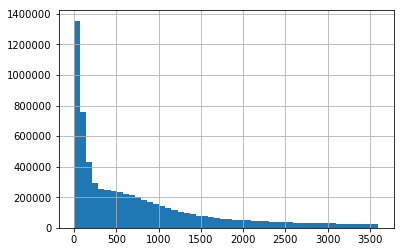

In [17]:
perc=len(sessions[sessions.secs_elapsed>3600])/len(sessions)
print('%.0f percent of the time entries in sessions table is longer than 1 hour.'% (perc*100))   

# look at the distribution of this column      
sessions.loc[sessions.secs_elapsed<=3600,'secs_elapsed'].hist(bins=50)

There seem to be two separate distributions contained in this distribution, and one of them looks like normal distribution. If it is a normal distribution, a better criteria could be used to set the boundary which data should be included in analysis. 

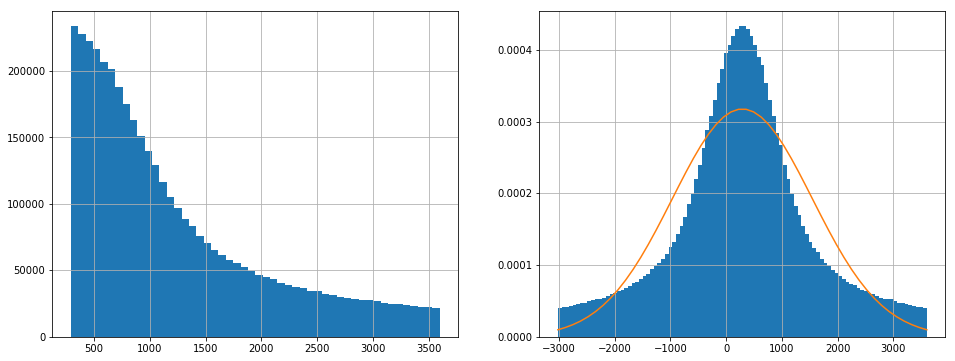

In [18]:
from sklearn import mixture
import matplotlib.mlab as mlab

fig,(ax1,ax2)=plt.subplots(1, 2, figsize=[16, 6])
a=sessions.loc[(sessions.secs_elapsed<=3600)&(sessions.secs_elapsed>290),'secs_elapsed']
a.hist(bins=50,ax=ax1)
# cannot fit to partial guassian directly, have to mirror it and hit to a normal guassian.In this way, mean is chosen
b=290*2-a
c=pd.Series(a.tolist()+b.tolist())
c.hist(bins=100,ax=ax2, normed=True)
clf = mixture.GaussianMixture(n_components=1, covariance_type='full')
clf.fit(c[:, np.newaxis]) # GMM requires 2D data
ax2.plot(np.linspace(c.min(), c.max()),
         mlab.normpdf(np.linspace(c.min(), c.max()),
                      clf.means_, np.sqrt(clf.covariances_[0]))[0])

# not a Guassian. Then randomly draw a line in 1/5 of hist maximum, only include time smaller than that boundary.
hist, bin_edges = np.histogram(a, bins=50, density=True)
hist=pd.Series(hist)
boundary=bin_edges[np.abs(hist-hist.max()/5).idxmin()]
sessions=sessions[sessions.secs_elapsed<=boundary]

Because I don't know the time for the information collected is before or after the first booking, cannot aggregate to see time or counts of actions before first booking. Therefore average and count variety are reasonable things to do here. Apply to the physically meaningful columns entries found above.

In [19]:
sessions_1['time_per_action']=sessions.groupby('user_id')['secs_elapsed'].agg('mean')
sessions_1['time_per_search']=sessions[sessions['action_detail']=='view_search_results'].groupby('user_id')['secs_elapsed'].agg('mean')
sessions_1['time_per_data']=sessions[sessions['action_type']=='data'].groupby('user_id')['secs_elapsed'].agg('mean')

Merge extracted data in sessions to main table

In [20]:
train_users=pd.merge(train_users,sessions_1, how = 'left', left_on='id', right_index=True)

### Countries data

In [21]:
train_users=train_users.merge(countries, how = 'left', left_on = 'country_destination', right_on='country_destination')

# add language matching column
train_users['language matching']=train_users.apply(lambda x: 1 if (x['language'],x['destination_language ']) in list(zip(['fr','es','it','de'],['fra','spa','ita','deu'])) else 0,axis=1)

Rearrange column orders to put country_destination at the last column

In [22]:
a=train_users['country_destination']
train_users=train_users.drop('country_destination',axis=1)
train_users['country_destination']=a
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,time_per_search,time_per_data,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,language matching,country_destination
0,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,NaN,NaN,36.966427,-95.84403,0.0,9826675.0,eng,0.0,0,US
1,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,other
2,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,...,NaN,NaN,36.966427,-95.84403,0.0,9826675.0,eng,0.0,0,US
3,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,NaN,NaN,basic,0,en,other,...,NaN,NaN,36.966427,-95.84403,0.0,9826675.0,eng,0.0,0,US
4,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,...,NaN,NaN,36.966427,-95.84403,0.0,9826675.0,eng,0.0,0,US


In [27]:
train_users.to_csv('data/train_users_1.csv',index=False)